In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
housing = fetch_california_housing()

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train[5805:].shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

(5805, 8)


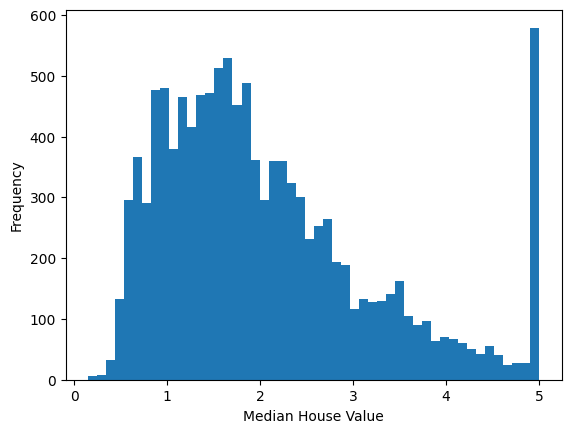

In [4]:
plt.hist(y_train, bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

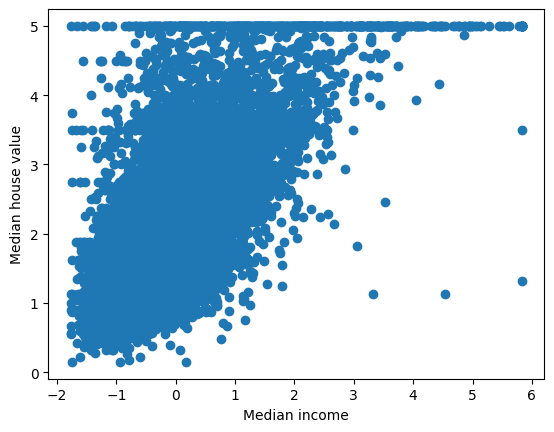

In [5]:
plt.scatter(X_train[:, 0], y_train)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.show()

In [ ]:
### Model

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=[X_train.shape[1]]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 742us/step - loss: 0.7348 - val_loss: 95578.7891
Epoch 2/20
363/363 [==============================] - 0s 597us/step - loss: 0.7987 - val_loss: 324429.1250
Epoch 3/20
363/363 [==============================] - 0s 585us/step - loss: 1.9372 - val_loss: 360103.6875
Epoch 4/20
363/363 [==============================] - 0s 609us/step - loss: 0.4290 - val_loss: 156489.8750
Epoch 5/20
363/363 [==============================] - 0s 622us/step - loss: 0.4141 - val_loss: 15404.2832
Epoch 6/20
363/363 [==============================] - 0s 590us/step - loss: 0.4000 - val_loss: 12756.0723
Epoch 7/20
363/363 [==============================] - 0s 601us/step - loss: 0.3969 - val_loss: 1930.4619
Epoch 8/20
363/363 [==============================] - 0s 602us/step - loss: 0.3891 - val_loss: 1448.3610
Epoch 9/20
363/363 [==============================] - 0s 604us/step - loss: 0.3884 - val_loss: 5335.0386
Epoch 10/20
363/363 [=========================

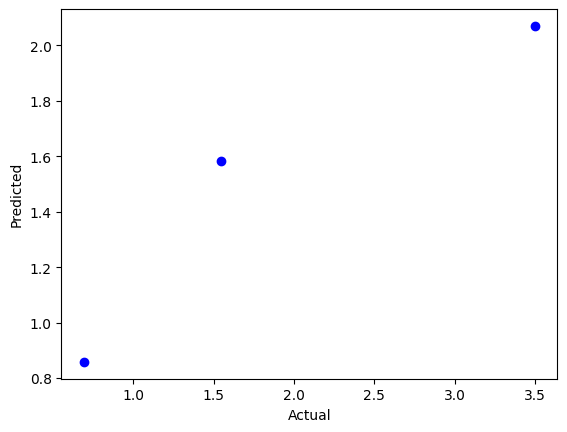

In [10]:
plt.plot(y_test[:3], y_pred, "bo")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [22]:
### Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before,
### to avoid overfitting

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = X_test[3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 786us/step - loss: 0.8700 - val_loss: 28430.4102
Epoch 2/20
363/363 [==============================] - 0s 601us/step - loss: 0.7009 - val_loss: 95114.3359
Epoch 3/20
363/363 [==============================] - 0s 600us/step - loss: 0.7909 - val_loss: 53779.5938
Epoch 4/20
363/363 [==============================] - 0s 598us/step - loss: 0.8012 - val_loss: 7780.0649
Epoch 5/20
363/363 [==============================] - 0s 617us/step - loss: 0.4057 - val_loss: 18766.7539
Epoch 6/20
363/363 [==============================] - 0s 586us/step - loss: 0.3894 - val_loss: 20999.8730
Epoch 7/20
363/363 [==============================] - 0s 604us/step - loss: 0.3787 - val_loss: 33811.1719
Epoch 8/20
363/363 [==============================] - 0s 601us/step - loss: 0.3706 - val_loss: 19535.0527
Epoch 9/20
363/363 [==============================] - 0s 622us/step - loss: 0.3675 - val_loss: 23151.6562
Epoch 10/20
363/363 [==========================

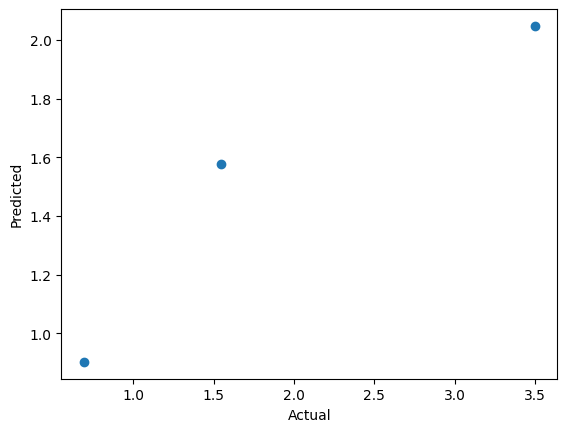

In [15]:
plt.scatter(y_test[:3], y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [29]:
### Building Complex Models Using Functional API // Wide & Deep

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [39]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 30)           270         ['input_6[0][0]']                
                                                                                                  
 dense_23 (Dense)               (None, 30)           930         ['dense_22[0][0]']               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 38)           0           ['input_6[0][0]',                
                                                                  'dense_23[0][0]']         

In [40]:
model.compile(loss="categorical_crossentropy", optimizer="SGD")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = X_test[3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 885us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 2/20
363/363 [==============================] - 0s 664us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 3/20
363/363 [==============================] - 0s 659us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 4/20
363/363 [==============================] - 0s 667us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 5/20
363/363 [==============================] - 0s 674us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 6/20
363/363 [==============================] - 0s 667us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 7/20
363/363 [==============================] - 0s 657us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 8/20
363/363 [==============================] - 0s 658us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 9/20
363/363 [==============================] - 0s 679us/step - loss: 2.4737e-07 - val_loss: 2.4440e-07
Epoch 10/2

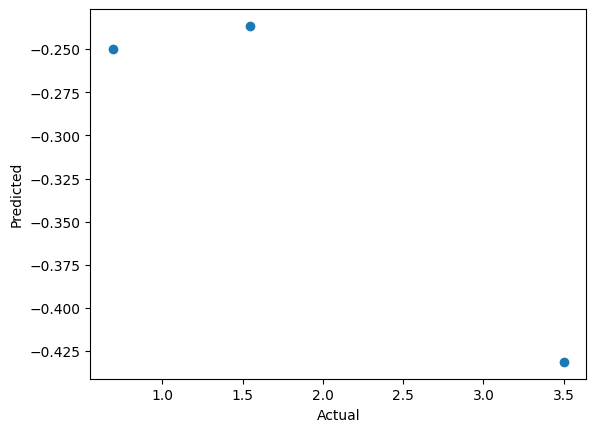

In [41]:
plt.scatter(y_test[:3], y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [20]:
## Wide & Deep with paralell 